In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [93]:
entrenamiento = pd.read_csv('Hipertension_Arterial_Mexico.csv')

In [94]:
entrenamiento

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2022_32056019,2,62,14.2,22,4.8,4.0,34,86.0,139,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,0
4359,2022_32056024,1,39,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780,0
4360,2022_32056026,2,69,15.9,11,2.9,1.9,21,44.0,74,...,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300,0
4361,2022_32056029,1,67,17.6,14,5.5,4.0,44,96.0,171,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,0


In [95]:
entrenamiento.drop('FOLIO_I',axis=1,inplace=True)

In [96]:
# Dividir los datos en características (X) y etiquetas (y)
X = entrenamiento.drop('riesgo_hipertension', axis=1)  # Características (atributos)
y = entrenamiento['riesgo_hipertension']  # Etiquetas (presencia de hipertensión arterial)

In [97]:
X

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,medida_cintura,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,0.0,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,0.0,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,0.0,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,98.5,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,0.0,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,0.0,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280
4359,1,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,80.0,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780
4360,2,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,0.0,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300
4361,1,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,0.0,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240


In [98]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Escalar las características para mejorar el rendimiento de la red neuronal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Inicializar el modelo secuencial
modelo = Sequential()

In [101]:
# Agregar capas ocultas
modelo.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Capa de entrada
modelo.add(Dense(32, activation='relu'))  # Capa oculta
modelo.add(Dense(16, activation='relu'))  # Capa oculta

c:\Users\liuph\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
# Agregar capa de salida
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida (predicción binaria)


In [103]:
# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
# Entrenar el modelo
curva=modelo.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6819 - loss: 0.6129 - val_accuracy: 0.8138 - val_loss: 0.4528
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8265 - loss: 0.3906 - val_accuracy: 0.8682 - val_loss: 0.3868
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8584 - loss: 0.3543 - val_accuracy: 0.8682 - val_loss: 0.3535
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8636 - loss: 0.3391 - val_accuracy: 0.8768 - val_loss: 0.3524
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8942 - loss: 0.2903 - val_accuracy: 0.8797 - val_loss: 0.3301
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8919 - loss: 0.2665 - val_accuracy: 0.8797 - val_loss: 0.3193
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8976 - loss: 0.2472 - val_accuracy: 0.8883 - val_loss: 0.3042
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9042 - loss: 0.2314 - val_accuracy: 0.8883 - val_loss: 0.3

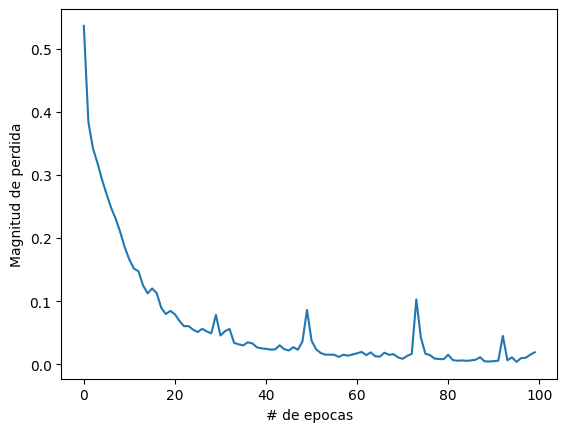

In [105]:
plt.xlabel("# de epocas")
plt.ylabel('Magnitud de perdida')
plt.plot(curva.history['loss'])

In [106]:
prediccion = modelo.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [107]:
prediccion

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [108]:
y_test

179     1
3168    1
2741    1
2191    1
1578    0
       ..
809     1
1657    1
2083    0
682     1
1862    0
Name: riesgo_hipertension, Length: 873, dtype: int64

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score,classification_report

In [110]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, prediccion)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, prediccion)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test, prediccion)

# Calcular el área bajo la curva ROC
auc_roc = roc_auc_score(y_test, prediccion)

In [112]:
print('mse: '+str(mse),' mae: '+str(mae),' R2: '+str(r2), ' ABC: '+str(auc_roc))

mse: 0.3516609392898053  mae: 0.3516609392898053  R2: -0.5378537492253668  ABC: 0.5032362459546926
